In [1]:
import sys
from collections import OrderedDict
import pandas as pd
import numpy as np
# Load libraries
import pandas
import pandas as pd
#from pandas.plotting import scatter_matrix <-- deprecated
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt

fname = 'BigData.xlsx'
dataset = pandas.read_excel(fname)
# preprocessing
dataset = dataset.replace('.', np.nan)
dataset.iloc[:, 6:] = dataset.iloc[:, 6:].apply(lambda row: row.astype(float))

In [2]:
# Applying Regression Model on original data
columnsListB = dataset.columns.values.tolist()
depVar = dataset['Disease Incidence'].values

# Three cases for independent vars: TAV, Rain fall, RH
st1 = columnsListB.index('pcpn_JunW1')
ed1 = columnsListB.index('pcpn_SeptW4')
st2 = columnsListB.index('TAV_JunW1')
ed2 = columnsListB.index('TAV_SeptW4')
st3 = columnsListB.index('RAV_JunW1')
ed3 = columnsListB.index('RAV_SeptW4')
indepVarRain = dataset.iloc[:, st1:ed1+1]
indepVarTAV = dataset.iloc[:, st2:ed2+1]
indepVarRAV = dataset.iloc[:, st3:ed3+1]

y = dataset['Disease Incidence'].round(0)

In [3]:
# Where to save the models
modelRAINSaved = 'lrModelRAIN.pkl'
modelTEMPSaved = 'lrModelTEMP.pkl'
modelTRHSaved = 'lrModelTRH.pkl'
modelRTRHSaved = 'lrModelRTRH.pkl'

In [4]:
# indepVarRain.std()
# indepVarTAV.std()
# indepVarRAV.std()

In [5]:
# indepVarRain.mean()
# indepVarTAV.mean()
# indepVarRAV.mean()

In [6]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.externals import joblib

from yellowbrick.model_selection import FeatureImportances
from yellowbrick.contrib import ScatterVisualizer
from yellowbrick.regressor import PredictionError

C:\Users\kpodo\AppData\Local\Continuum\anaconda3V520\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
C:\Users\kpodo\AppData\Local\Continuum\anaconda3V520\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [7]:
################################# Rain Fall: Features selection #######################################

In [8]:
###### Using Random Forest
X = indepVarRain
# model = RandomForestClassifier(n_estimators=10)
# model = RandomForestRegressor(n_estimators = 10, )
# model = LinearRegression()
# viz = FeatureImportances(model, title='Predicting ERI based on 16 vars rainfall (no standardized)', size=(1080, 900),)
# viz.fit(X, y)
# viz.show()
# print(X.shape, y.shape)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
### Applying Standard Scaler:

allreg = dataset.iloc[:, st1:]
col = allreg.columns.values.tolist()
stdScaler = StandardScaler()
stdScaler.fit(allreg)
df = stdScaler.transform(allreg)
df = pd.DataFrame(df)
df = df.rename(columns=lambda x: col[int(x)])
# df
len(col)

48

C:\Users\kpodo\AppData\Local\Continuum\anaconda3V520\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


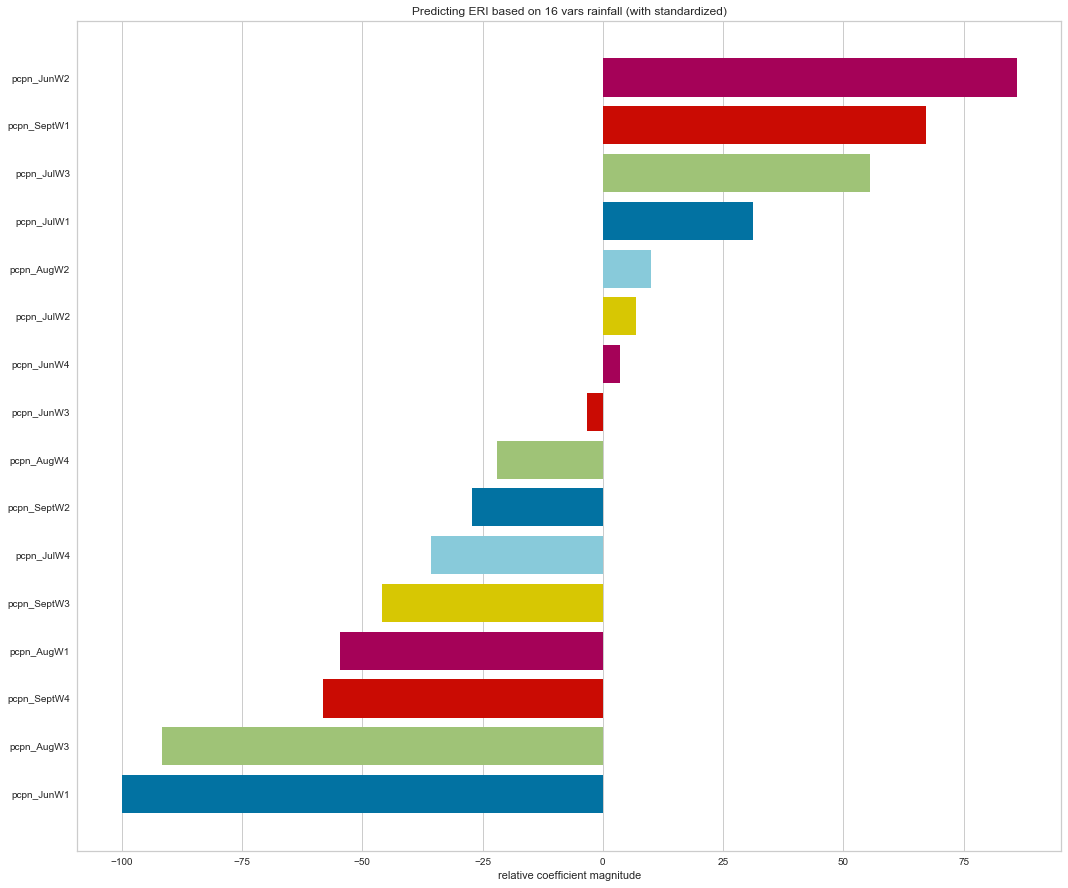

In [11]:
## For rainfall
X = df.iloc[:, 0:16]
model = LinearRegression()
viz = FeatureImportances(model, title='Predicting ERI based on 16 vars rainfall (with standardized)', size=(1080, 900),)
viz.fit(X, y)
viz.show()


In [12]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from yellowbrick.contrib import ScatterVisualizer
from yellowbrick.regressor import PredictionError

In [13]:
pos_reg = [ 'pcpn_JunW2', 'pcpn_SeptW1', 'pcpn_JulW3', 'pcpn_JulW1', 'pcpn_SeptW2', 'pcpn_JulW4', 'pcpn_SeptW3', 'pcpn_AugW1', 'pcpn_SeptW4', 'pcpn_AugW3', 'pcpn_JunW1',]
df_pos_reg = df[pos_reg]
X = df_pos_reg
# X

In [14]:
# Create the train and test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)
XRain = X
yRain = y
XRain_train, XRain_test, yRain_train, yRain_test = train_test_split(XRain, yRain, test_size=0.2)
lrModelRAIN = LinearRegression()
lrModelRAIN.fit(XRain_train, yRain_train)
# Save the model
joblib.dump(lrModelRAIN, modelRAINSaved)

ypred = lrModelRAIN.predict(XRain_test)
ypred
# XRain_test
# lrModelRAIN.score(XRain_train, yRain_train)
# print('Coef: ', lrModelRAIN.coef_)
# print(XRain.shape)
# Instantiate the linear model and visualizer
# model = LinearRegression()
# visualizer = PredictionError(
#                 model, point_color=["red", "blue"], title='Predicting ERI based on 16 vars rainfall'
#                 , size=(1080, 900), )

# visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# visualizer.size()
# visualizer.show()
# XRain.shape
# coefficients = pd.concat([pd.DataFrame(XRain),pd.DataFrame(np.transpose(lrModelRAIN.coef_))], axis = 1)
# print('Coef: ', coefficients)

array([18.68973805, 52.18427686, 81.08456636, 52.18427686, 74.30323729,
       24.48809005, 31.05871615, 26.11604381, 74.30323729, 26.76658655,
       20.66424092, 74.30323729, 34.17080136, 15.92819496, 26.11604381,
       20.66424092, 17.67953914, 26.11604381, 17.67953914, 17.67953914,
       52.18427686, 20.9573403 , 41.23133335, 52.18427686, 81.08456636,
       17.67953914, 31.05871615, 52.18427686, 18.68973805, 18.68973805,
       26.11604381, 20.9573403 , 24.48809005, 20.66424092, 24.43494112,
       17.67953914, 15.92819496, 24.48809005, 34.17080136, 15.92819496,
       41.23133335, 20.9573403 , 15.92819496, 34.17080136, 31.05871615,
       18.68973805, 31.05871615, 45.40092615, 24.48809005, 18.68973805,
       24.43494112, 31.05871615, 26.11604381, 26.11604381, 31.05871615,
       41.23133335, 52.18427686, 20.9573403 ,  2.20520928, 15.92819496,
       26.76658655, 18.68973805, 74.30323729, 18.68973805, 26.11604381,
       74.30323729, 26.76658655, 24.48809005, 34.17080136, 20.95

In [15]:
pos_reg = [ 'pcpn_JunW2', 'pcpn_SeptW1', 'pcpn_JulW3', 'pcpn_JulW1', 'pcpn_SeptW2', 'pcpn_JulW4', 'pcpn_SeptW3', 'pcpn_AugW1', 'pcpn_SeptW4', 'pcpn_AugW3', 'pcpn_JunW1',]
# df_pos_reg = df[pos_reg]
X = df_pos_reg

# Create the train and test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

XRain = X
yRain = y
XRain_train, XRain_test, yRain_train, yRain_test = train_test_split(XRain, yRain, test_size=0.2)
lrModelRAIN = LinearRegression()
lrModelRAIN.fit(XRain_train, yRain_train)
# Save the model
joblib.dump(lrModelRAIN, modelRAINSaved)
ypred = lrModelRAIN.predict(XRain_test)
ypred



# XRain_test
dfPyQT = pd.read_csv('out.csv')
regListRAIN = [ 'RAIN-Jun-W2', 'RAIN-Sep-W1', 'RAIN-Jul-W3', 'RAIN-Jul-W1', 'RAIN-Sep-W2', 'RAIN-Jul-W4', 'RAIN-Sep-W3', 'RAIN-Aug-W1', 'RAIN-Sep-W4', 'RAIN-Aug-W3', 'RAIN-Jun-W1']
dfPyQT = dfPyQT[regListRAIN]
dfPyQT

# allreg = dataset.iloc[:, st1:]
col = dfPyQT.columns.values.tolist()
stdScaler = StandardScaler()
stdScaler.fit(dfPyQT)
dfA = stdScaler.transform(dfPyQT)
dfA = pd.DataFrame(dfA)
dfA = dfA.rename(columns=lambda x: col[int(x)])
dfA
ypredNonSt = lrModelRAIN.predict(dfA)
ypredNonSt

# dfA.to_csv (r'C:\Users\kpodo\Documents\dfA.csv', index = None, header=True)
# XRain_test.to_csv (r'C:\Users\kpodo\Documents\XRain_test.csv', index = None, header=True)
# ypredDf = pd.DataFrame({'from bigdata':ypred})
# ypredDf.to_csv (r'C:\Users\kpodo\Documents\ypredDf.csv', index = None, header=True)

# ypredNonSt = pd.DataFrame({'fresampler':ypredNonSt})
# ypredNonSt.to_csv (r'C:\Users\kpodo\Documents\ypredNonSt.csv', index = None, header=True)
# ypredNonSt.savetxt(r"C:\Users\kpodo\Documents\ypredNonSt.csv", a, delimiter=",")
# # Instantiate the linear model and visualizer
# model = LinearRegression()
# visualizer = PredictionError(
#                 model, point_color=["red", "blue"], title='Predicting ERI based on selected rainfall'
#                 , size=(1080, 900), )

# visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# # visualizer.size()
# visualizer.show() 

coefficients1 = pd.concat([pd.DataFrame(XRain_train.columns),pd.DataFrame(np.transpose(lrModelRAIN.coef_))], axis = 1)
coefficients1
# lrModelRAIN.intercept_

0           0
0    pcpn_JunW2   99.770762
1   pcpn_SeptW1   61.772627
2    pcpn_JulW3   41.725012
3    pcpn_JulW1   25.760761
4   pcpn_SeptW2  -30.375813
5    pcpn_JulW4  -21.767147
6   pcpn_SeptW3  -26.728899
7    pcpn_AugW1  -46.246720
8   pcpn_SeptW4  -24.632955
9    pcpn_AugW3  -71.073114
10   pcpn_JunW1 -129.130503

In [16]:
coefficients2 = pd.concat([pd.DataFrame(dfA.columns),pd.DataFrame(np.transpose(lrModelRAIN.coef_))], axis = 1)
coefficients2

0           0
0   RAIN-Jun-W2   99.770762
1   RAIN-Sep-W1   61.772627
2   RAIN-Jul-W3   41.725012
3   RAIN-Jul-W1   25.760761
4   RAIN-Sep-W2  -30.375813
5   RAIN-Jul-W4  -21.767147
6   RAIN-Sep-W3  -26.728899
7   RAIN-Aug-W1  -46.246720
8   RAIN-Sep-W4  -24.632955
9   RAIN-Aug-W3  -71.073114
10  RAIN-Jun-W1 -129.130503

In [17]:
##### Using feature importance on all the 48 vars

C:\Users\kpodo\AppData\Local\Continuum\anaconda3V520\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


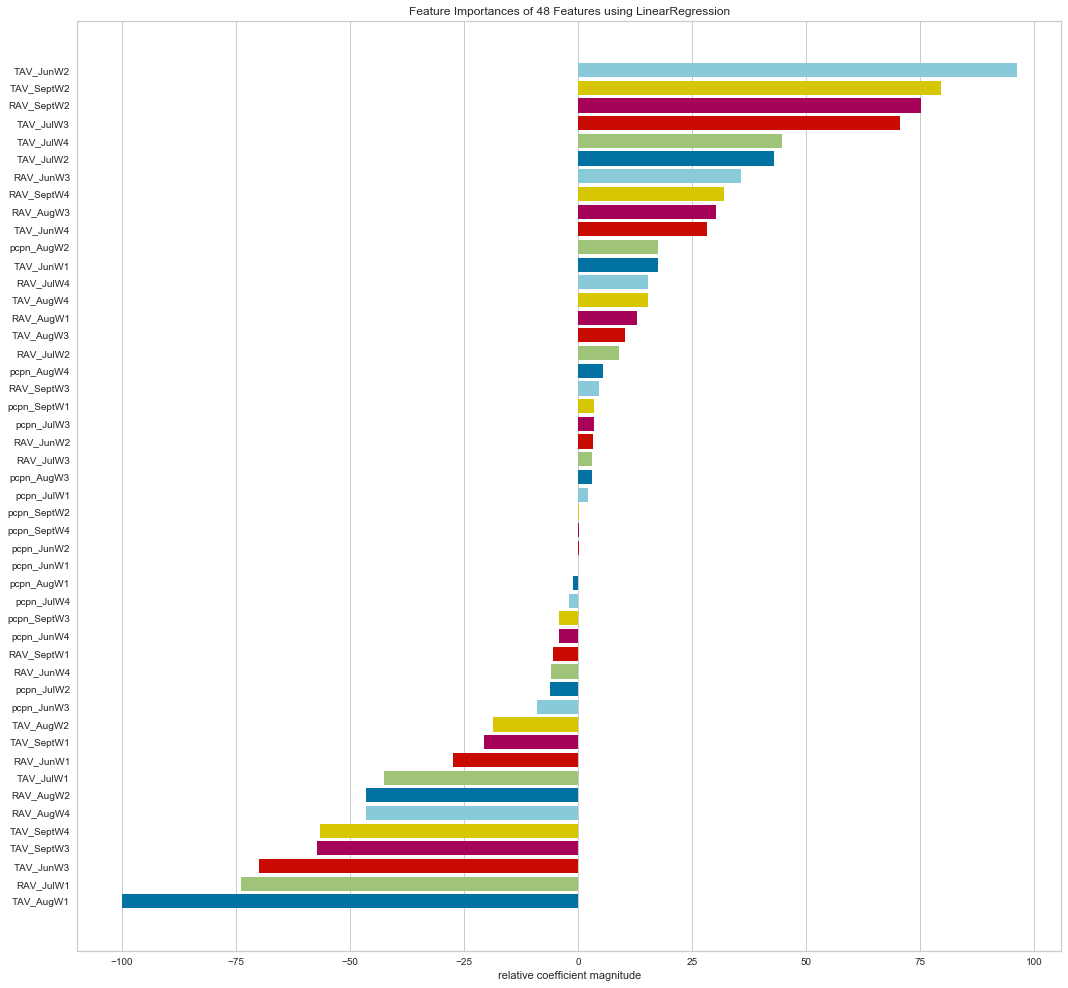

In [18]:
X = allreg
model = LinearRegression()
viz = FeatureImportances(model,  size=(1080, 1000),)
viz.fit(X, y, )
viz.show(outpath="featureimportance.png")
viz.show()

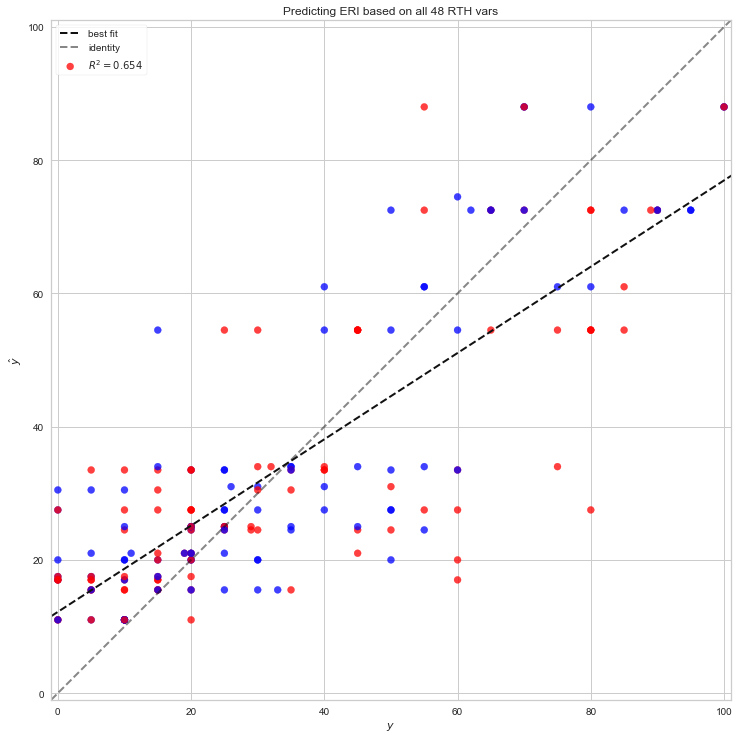

In [19]:
X = allreg
# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(
                model, point_color=["red", "blue"], title='Predicting ERI based on all 48 RTH vars'
                , size=(1080, 900), )

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# visualizer.size()
visualizer.show() 

In [20]:
### scatter plot based on strong features:

allreg2List = [ 'RAV_AugW2', 'TAV_JunW4', 'TAV_AugW1', 'RAV_JunW3', 'TAV_JunW2', 'RAV_SeptW4', 'TAV_SeptW4', 'RAV_JulW4', 'TAV_JulW1', 'TAV_AugW3', 'RAV_JulW2',]
df_pos_reg = df[allreg2List]
X = df_pos_reg

# define indep + dep vars
XRTRh = X
yRTRh = y
# Split data here
XRTRh_train, XRTRh_test, yRTRh_train, yRTRh_test = train_test_split(XRTRh, yRTRh, test_size=0.2)
# Define and train model
lrModelRTRH = LinearRegression()
lrModelRTRH.fit(XRTRh_train, yRTRh_train)
# Save the model
joblib.dump(lrModelRTRH, modelRTRHSaved)

# # Create the train and test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# # Instantiate the linear model and visualizer
# model = LinearRegression()
# visualizer = PredictionError(
#                 model, point_color=["red", "blue"], title='Predicting ERI based on all vars - selected'
#                 , size=(1080, 900), )

# visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# # visualizer.size()
# visualizer.show() 

['lrModelRTRH.pkl']

C:\Users\kpodo\AppData\Local\Continuum\anaconda3V520\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


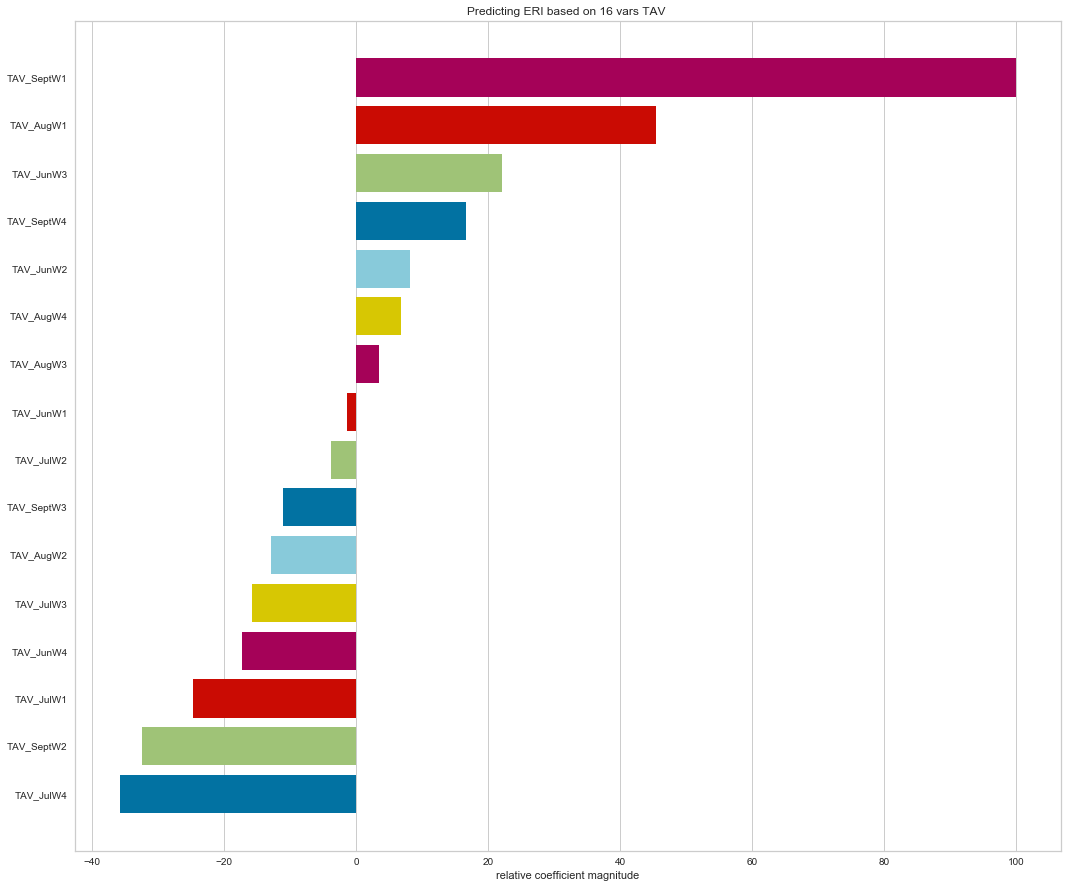

In [21]:
## For TAV
X = df.iloc[:, 16:32]
model = LinearRegression()
viz = FeatureImportances(model, title='Predicting ERI based on 16 vars TAV ', size=(1080, 900),)
viz.fit(X, y)
viz.show()


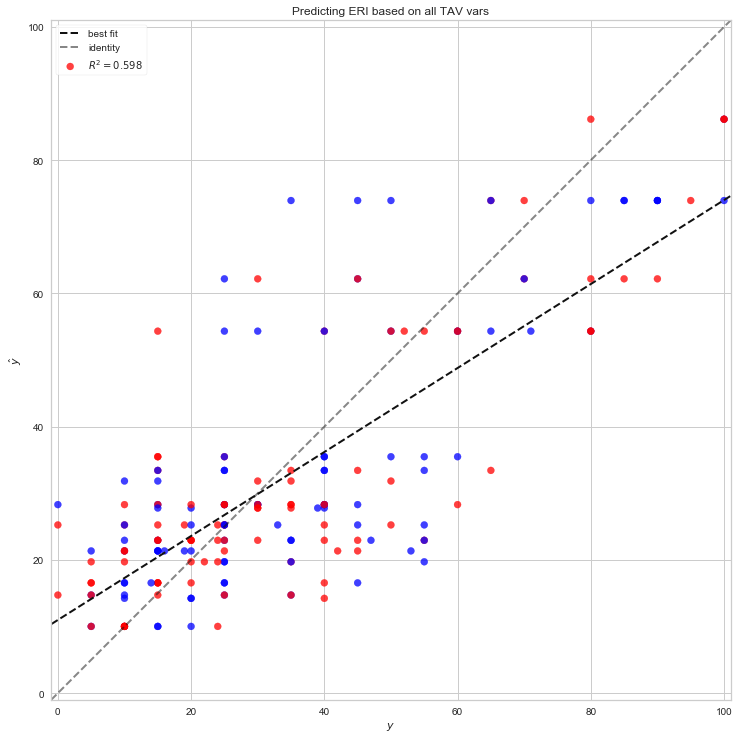

In [22]:
# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(
                model, point_color=["red", "blue"], title='Predicting ERI based on all TAV vars'
                , size=(1080, 900), )

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# visualizer.size()
visualizer.show() 

In [23]:
allreg3List = [  'TAV_SeptW1','TAV_AugW1', 'TAV_JulW1',  'TAV_SeptW2', 'TAV_JulW4', ]
df_pos_reg = df[allreg3List]
X = df_pos_reg

# define indep + dep vars
XTemp = X
yTemp = y
# Split data here
XTemp_train, XTemp_test, yTemp_train, yTemp_test = train_test_split(XTemp, yTemp, test_size=0.2)
# Define and train model
lrModelTEMP = LinearRegression()
lrModelTEMP.fit(XTemp_train, yTemp_train)
# Save the model
joblib.dump(lrModelTEMP, modelTEMPSaved)

# # Create the train and test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# # Instantiate the linear model and visualizer
# model = LinearRegression()
# visualizer = PredictionError(
#                 model, point_color=["red", "blue"], title='Predicting ERI based on selected TAV vars'
#                 , size=(1080, 900), )

# visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# # visualizer.size()
# visualizer.show() 

['lrModelTEMP.pkl']

C:\Users\kpodo\AppData\Local\Continuum\anaconda3V520\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


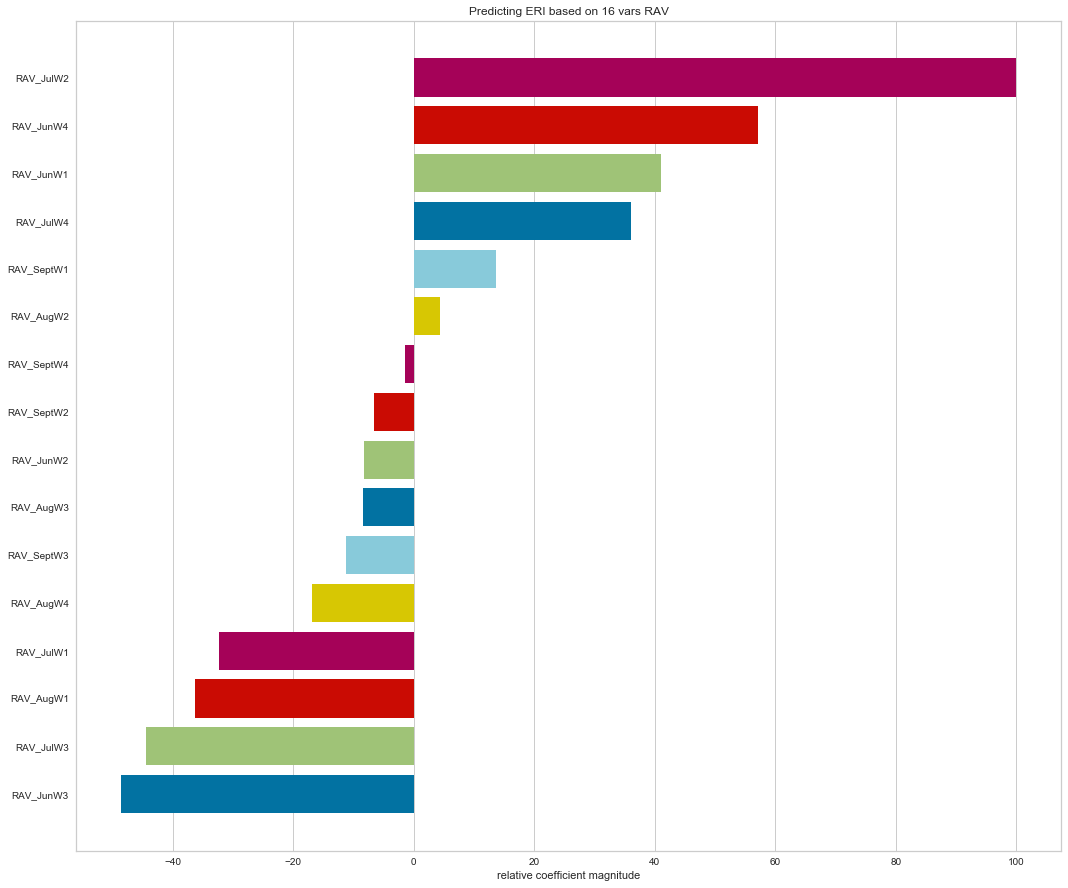

In [24]:
## For RAH
X = df.iloc[:, 32:64]
model = LinearRegression()
viz = FeatureImportances(model, title='Predicting ERI based on 16 vars RAV', size=(1080, 900),)
viz.fit(X, y)
viz.show()


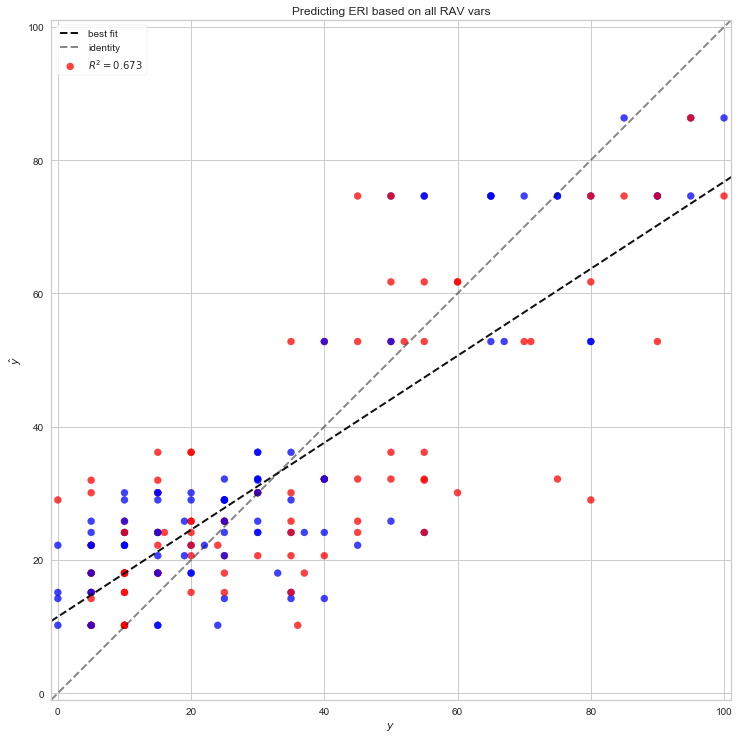

In [25]:
# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(
                model, point_color=["red", "blue"], title='Predicting ERI based on all RAV vars'
                , size=(1080, 900), )

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# visualizer.size()
visualizer.show() 

In [26]:
allreg4List = [  'RAV_JulW2','RAV_JunW4', 'RAV_JunW1', 'RAV_JulW4',  'RAV_JulW1', 'RAV_AugW1', 'RAV_JulW3', 'RAV_JunW3'   ]
df_pos_reg = df[allreg4List]
X = df_pos_reg

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)



# # Instantiate the linear model and visualizer
# model = LinearRegression()
# visualizer = PredictionError(
#                 model, point_color=["red", "blue"], title='Predicting ERI based on selected RAV vars'
#                 , size=(1080, 900), )

# visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# # visualizer.size()
# visualizer.show() 

C:\Users\kpodo\AppData\Local\Continuum\anaconda3V520\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


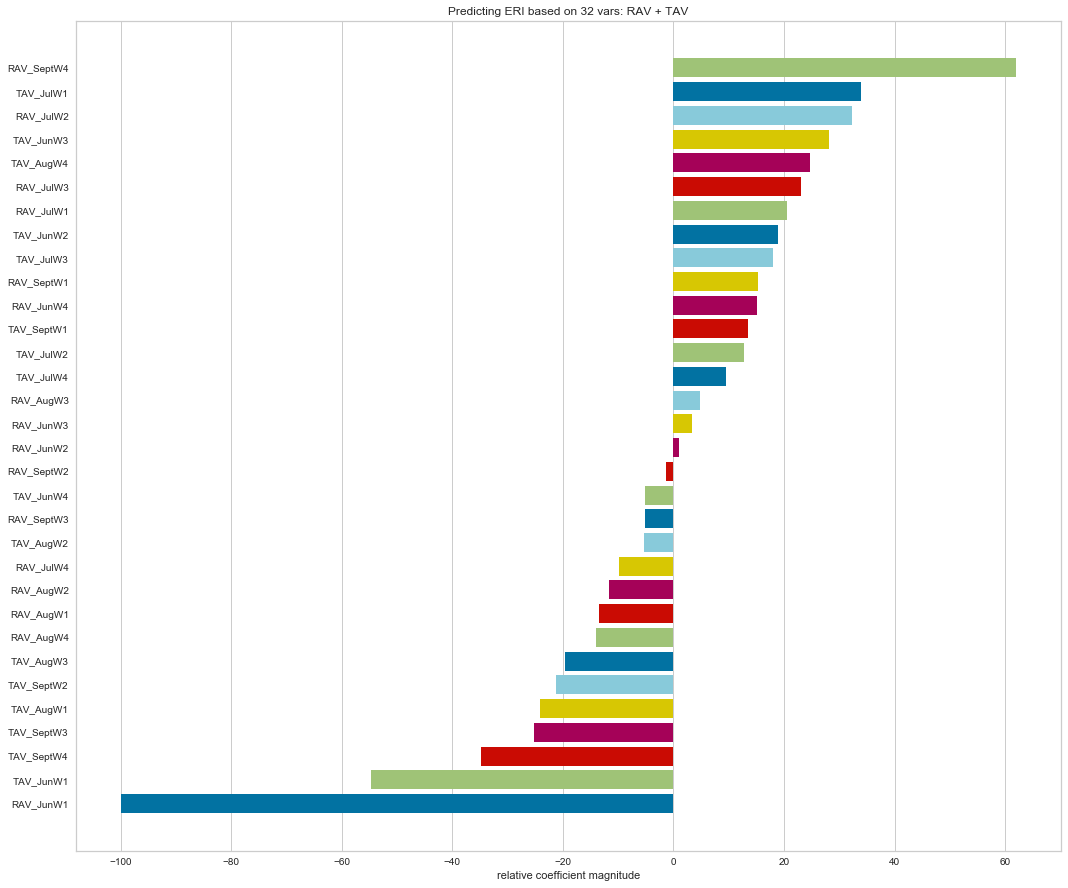

In [27]:

# combining RH and TAV
## For TAV
X = df.iloc[:, 16:64]
model = LinearRegression()
viz = FeatureImportances(model, title='Predicting ERI based on 32 vars: RAV + TAV', size=(1080, 900),)
viz.fit(X, y)
viz.show()


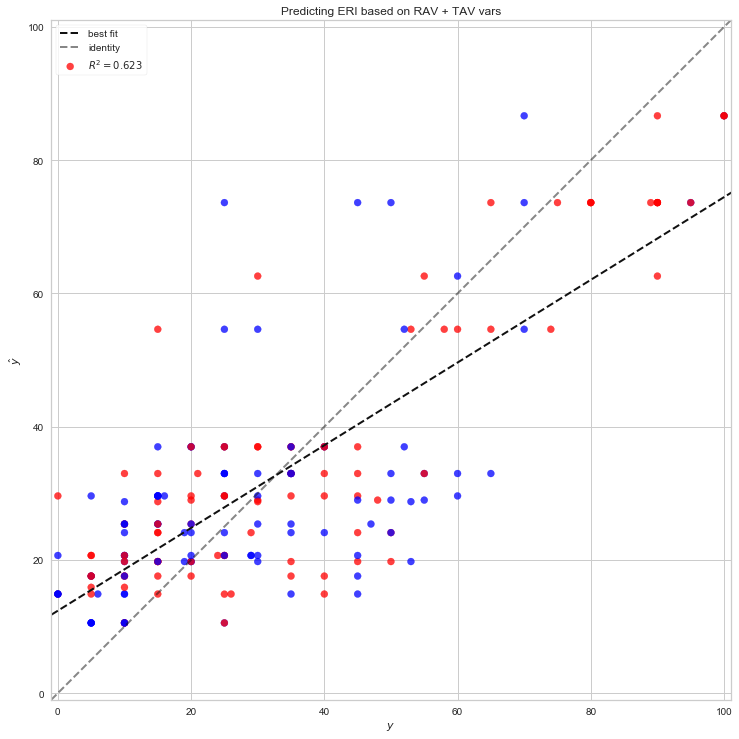

In [28]:
# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(
                model, point_color=["red", "blue"], title='Predicting ERI based on RAV + TAV vars'
                , size=(1080, 900), )

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# visualizer.size()
visualizer.show() 

In [29]:
allreg5List = [ 'TAV_AugW3', 'RAV_SeptW3', 'TAV_SeptW2', 'TAV_JunW1', 'RAV_JunW3', 'TAV_JunW3', 'TAV_JulW4',  'TAV_AugW4'   ]
df_pos_reg = df[allreg5List]
X = df_pos_reg
y = dataset['Disease Incidence'] #.values.reshape(-1,1)

XTRh = X
yTRh = y
# Split data here
XTRh_train, XTRh_test, yTRh_train, yTRh_test = train_test_split(XTRh, yTRh, test_size=0.2)
# Define and train model
lrModelTRH = LinearRegression()
lrModelTRH.fit(XTRh_train, yTRh_train)
# Save the model
joblib.dump(lrModelTRH, modelTRHSaved)

# # y.shape
# # Create the train and test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# # Instantiate the linear model and visualizer
# model = LinearRegression()
# visualizer = PredictionError(
#                 model, point_color=["red", "blue"], title='Predicting ERI based on selected RAV+TAV vars'
#                 , size=(1080, 900), )

# visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# # visualizer.size()
# visualizer.show() 

['lrModelTRH.pkl']

In [30]:
import matplotlib.patches as mpatches

In [31]:
# Where to save the models
modelRAINSavedLR = 'modelRAINSavedLR.pkl'
modelRAINSavedLA = 'modelRAINSavedLA.pkl'
modelRAINSavedRF = 'modelRAINSavedRF.pkl'

modelTEMPSavedLR = 'modelTEMPSavedLR.pkl'
modelTEMPSavedLA = 'modelTEMPSavedLA.pkl'
modelTEMPSavedRF = 'modelTEMPSavedRF.pkl'

modelTRHSavedLR = 'modelTRHSavedLR.pkl'
modelTRHSavedLA = 'modelTRHSavedLA.pkl'
modelTRHSavedRF = 'modelTRHSavedRF.pkl'

modelRTRHSavedLR = 'modelRTRHSavedLR.pkl'
modelRTRHSavedLA = 'modelRTRHSavedLA.pkl'
modelRTRHSavedRF = 'modelRTRHSavedRF.pkl'


eriDonLRSaved = 'eriDonLR.pkl'
eriDonLASaved = 'eriDonLA.pkl'
eriDonRFSaved = 'eriDonRF.pkl'

In [32]:
from sklearn.impute import SimpleImputer
X = dataset['Disease Incidence'].values.reshape(-1,1)
y = dataset['DON (ppm)'].values.reshape(-1,1)
# print(X.shape, y.shape)
impX = SimpleImputer(missing_values=np.nan, strategy='mean')
impy = SimpleImputer(missing_values=np.nan, strategy='mean')
X = impX.fit_transform(X)
y = impy.fit_transform(y)

In [33]:
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# Instantiate the linear model and visualizer
model = LinearRegression()
# model = RandomForestRegressor(max_depth=3, max_leaf_nodes=2, n_estimators=10)
# # model = BaggingRegressor(n_estimators=20)
# # model = AdaBoostRegressor() # no way# 
# # model = Lasso(alpha=15)




model.fit(X_train, y_train) #training the algorithm
joblib.dump(model, eriDonLRSaved)
y_pred = model.predict(X_test)

# r2 = model.score(X_test, y_test)
# import math
# r = math.sqrt(r2)
# # print("Linear Reg --> R^2, R:", r2, r)

# plt.scatter(X_test, y_test,  color='gray')
# plt.plot(X_test, y_pred, color='red',  )
# plt.title('linear_regression: Predicting DON with ERI')


# red_patch = mpatches.Patch(color='white', label='R-square is {0}'.format(str(r2)))
# blue_patch = mpatches.Patch(color='white', label='R is {0}'.format(str(r)))

# plt.gca().legend(handles=[red_patch, blue_patch], loc='upper right')
# plt.savefig('AnalysisResults\\eri_don_linear_regression.png', dpi=300)
# plt.show()

print(X_test.shape, X_train.shape, y_pred.shape)

(190, 1) (760, 1) (190, 1)


In [34]:
resiDONLR = y_test - y_pred

In [35]:
res2 = resiDONLR + 2.1286184853867027
res2[res2<0] = np.nan
res2_noNan = res2[~np.isnan(res2)]
res2_noNan

array([1.25149917e+00, 3.17521818e+00, 2.70265622e+00, 1.93893720e+00,
       8.83802802e+00, 2.97521818e+00, 3.40265622e+00, 2.04149917e+00,
       2.87521818e+00, 3.36623101e-01, 4.46546605e+00, 5.85174704e+00,
       1.20342118e-01, 1.10662310e+00, 1.47521818e+00, 1.88893720e+00,
       3.16637523e+00, 9.06791932e+00, 3.30265622e+00, 5.67521818e+00,
       4.42266567e-01, 1.88893720e+00, 2.14893720e+00, 9.47780150e-01,
       1.75521818e+00, 1.43149917e+00, 2.71637523e+00, 1.62034212e+00,
       2.71637523e+00, 2.30265622e+00, 1.47521818e+00, 7.79185069e-01,
       7.84061134e-01, 8.87521818e+00, 2.71637523e+00, 3.54778015e+00,
       1.69521818e+00, 2.08521818e+00, 2.98637523e+00, 2.41994905e-01,
       9.26943294e+00, 2.71637523e+00, 2.36149917e+00, 2.69893720e+00,
       5.26943294e+00, 6.84061134e-01, 1.12034212e+00, 1.18929041e+01,
       2.12893720e+00, 2.14893720e+00, 3.68893720e+00, 1.40989413e+00,
       2.04199491e+00, 1.55713922e-01, 1.79687097e+00, 1.06149917e+00,
      

(0, 10)

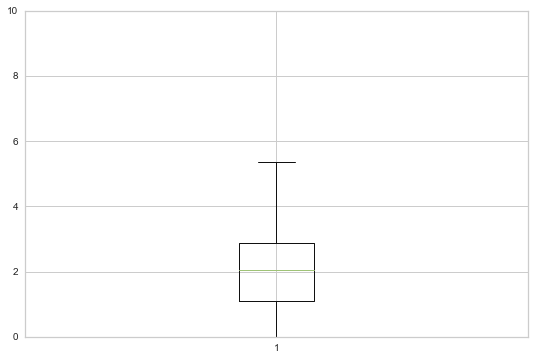

In [36]:
fig3 = plt.figure(1, figsize=(9, 6))
ax3 = fig3.add_subplot(111)
ax3.boxplot(res2_noNan)
plt.ylim(0, 10)

(0, 10)

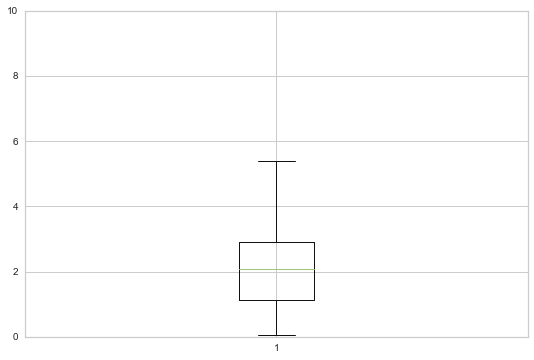

In [37]:
res3 = resiDONLR + 2.169272419254848
res3[res3<0] = np.nan
res3_noNan = res3[~np.isnan(res3)]

fig4 = plt.figure(1, figsize=(9, 6))
ax4 = fig4.add_subplot(111)
ax4.boxplot(res3_noNan)
plt.ylim(0, 10)

In [38]:
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# Instantiate the linear model and visualizer
# model = LinearRegression()
model = RandomForestRegressor(max_depth=3, max_leaf_nodes=2, n_estimators=10)
# model = BaggingRegressor(n_estimators=20)
# model = AdaBoostRegressor() # no way# 
# model = Lasso(alpha=15)




model.fit(X_train, y_train) #training the algorithm
model.fit(X_train, y_train) #training the algorithm
joblib.dump(model, eriDonRFSaved)
# y_pred = model.predict(X_test)

# y_pred = model.predict(X_test)

# plt.scatter(X_test, y_test,  color='gray')
# plt.plot(X_test, y_pred, color='red',  )
# plt.title('Random Forest: Predicting DON with ERI')
# r2 = model.score(X_test, y_test)
# import math
# r = math.sqrt(r2)
# print("RF --> R^2, R:", r2, r)
# red_patch = mpatches.Patch(color='white', label='R-square is {0}'.format(str(r2)))
# blue_patch = mpatches.Patch(color='white', label='R is {0}'.format(str(r)))
# plt.gca().legend(handles=[red_patch, blue_patch], loc='upper right')
# plt.savefig('AnalysisResults\\eri_don_randomforest_regression.png', dpi=300)
# plt.show()

C:\Users\kpodo\AppData\Local\Continuum\anaconda3V520\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
C:\Users\kpodo\AppData\Local\Continuum\anaconda3V520\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


['eriDonRF.pkl']

In [39]:
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# Instantiate the linear model and visualizer
# model = LinearRegression()
# model = RandomForestRegressor(max_depth=3, max_leaf_nodes=2, n_estimators=10)
# model = BaggingRegressor(n_estimators=20)
model = Lasso(alpha=15)




model.fit(X_train, y_train) #training the algorithm
model.fit(X_train, y_train) #training the algorithm
model.fit(X_train, y_train) #training the algorithm
joblib.dump(model, eriDonLASaved)
# y_pred = model.predict(X_test)

# plt.scatter(X_test, y_test,  color='gray')
# plt.plot(X_test, y_pred, color='red',  )
# plt.title('Lasso: Predicting DON with ERI')
# r2 = model.score(X_test, y_test)
# import math
# r = math.sqrt(r2)
# print("RF --> R^2, R:", r2, r)
# red_patch = mpatches.Patch(color='white', label='R-square is {0}'.format(str(r2)))
# blue_patch = mpatches.Patch(color='white', label='R is {0}'.format(str(r)))
# plt.gca().legend(handles=[red_patch, blue_patch], loc='upper right')
# plt.savefig('AnalysisResults\\eri_don_lasso_regression.png', dpi=300)
# plt.show()

['eriDonLA.pkl']

In [40]:
r2 = model.score(X_test, y_test)
import math
r = math.sqrt(r2)
print("Lasso --> R^2, R:", r2, r)

Lasso --> R^2, R: 0.2296708518235905 0.4792398687751161
